<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [3]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


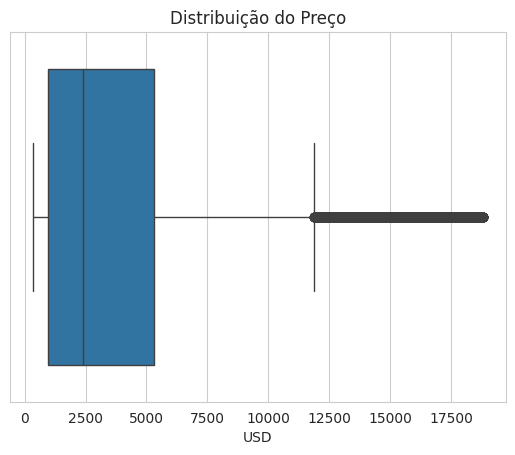

In [4]:
with sns.axes_style('whitegrid'):

  diamonds = sns.boxplot(x=data['price'])
  diamonds.set(title='Distribuição do Preço', xlabel='USD');


**Insight do gráfico 1**: ...
A maioria do preço dos diamantes estão concentrados entre 1000 a 5000 USD, após os 12500 USD os diamantes são considerados mais raros e caros.

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
n_data = data.sort_values(by=['price', 'carat'], ascending=True).reset_index()
n_data.head()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


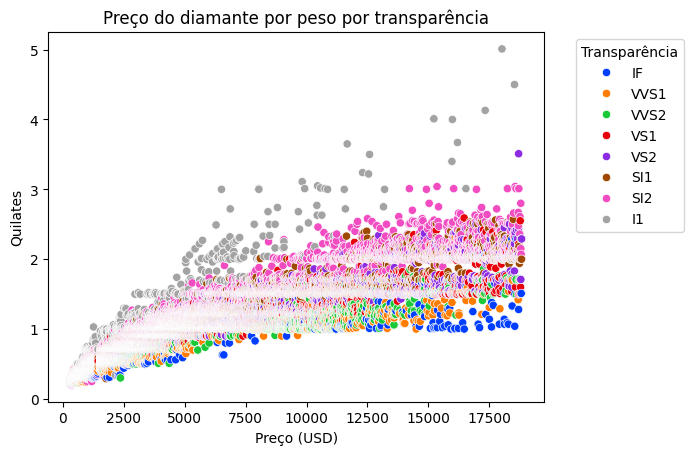

In [7]:
grafico = sns.scatterplot(data=n_data, x="price", y="carat", hue="clarity", palette="bright")
grafico.set(title='Preço do diamante por peso por transparência', xlabel='Preço (USD)', ylabel='Quilates')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Transparência")

**Insight do gráfico 2**: Diamantes com maior clareza, são mais caros mesmo quando possuem um peso menor.
Diamantes com menor clareza, necessitam de um peso maior para conseguirem atingir o preço dos mais claros

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


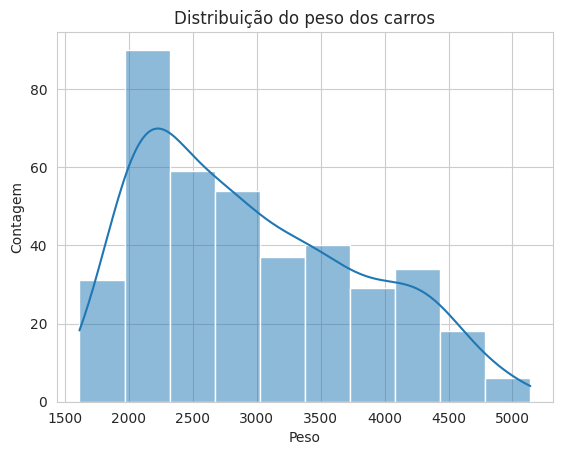

In [9]:
# gráfico do exercício 3

cars = data[['weight']]

with sns.axes_style('whitegrid'):
  grafico = sns.histplot(data=cars, x="weight", kde=True)
  grafico.set(title='Distribuição do peso dos carros', xlabel='Peso', ylabel='Contagem')

**Insight do gráfico 3**: ...
O gráfico aponta que possuímos mais carros com o peso entre 2000 a 2500 e após esses o peso vão aumentando porém a contagem dos carros são menores.

---